# Generative Adversarial Network

GAN adapted from Tariq Rashid at https://github.com/makeyourownneuralnetwork/gan
Contents:<br>
1. Program Definition and tests to check function
2. Training GAN
3. Saving outputs during training into CSV
4. Printing outputs
5. Saving final outputs


### 1. Program Definition

In [127]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset

import pandas
import matplotlib.pyplot as plt
import csv
import numpy

In [128]:
# dataset class - this will load data into dataframe, and has functions to check the image

class MnistDataset(Dataset):
    
    def __init__(self, csv_file):
        self.data_df = pandas.read_csv(csv_file, header=None)
        pass
    
    def __len__(self):
        return len(self.data_df)
    
    def __getitem__(self, index):
        # image target (label)
        label = self.data_df.iloc[index,0]
        target = torch.zeros((10))
        target[label] = 1.0
        
        # image data, normalised from 0-255 to 0-1
        image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values) / 255.0
        
        # return label, image data tensor and target tensor
        return label, image_values, target
    
    def plot_image(self, index):
        img = self.data_df.iloc[index,1:].values.reshape(28,28)
        plt.title("label = " + str(self.data_df.iloc[index,0]))
        plt.imshow(img, interpolation='none', cmap='Blues')
        pass
    
    pass

In [129]:
# functions to generate random data
# random noise for generator

def generate_random_image(size):
    random_data = torch.rand(size)
    return random_data


def generate_random_seed(size):
    random_data = torch.randn(size)
    return random_data


In [130]:
# discriminator class

class Discriminator(nn.Module):
    
    def __init__(self):
        # initialise parent pytorch class
        super().__init__()
        
        # define neural network layers
        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.LeakyReLU(0.02),

            nn.LayerNorm(200),

            nn.Linear(200, 1),
            nn.Sigmoid()
        )
        
        # create loss function
        self.loss_function = nn.BCELoss()

        # create optimiser, simple stochastic gradient descent
        self.optimiser = torch.optim.Adam(self.parameters(), lr=0.0001)

        # counter and accumulator for progress
        self.counter = 0;
        self.progress = []

        pass
    
    
    def forward(self, inputs):
        # simply run model
        return self.model(inputs)
    
    def train(self, inputs, targets):
        # calculate the output of the network
        outputs = self.forward(inputs)
        
        # calculate loss
        loss = self.loss_function(outputs, targets)

        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass
    
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))
        pass
    
    pass

In [131]:
# load dataset
mnist_dataset = MnistDataset('mnist_dataset/mnist_train.csv')

In [134]:
# generator class

class Generator(nn.Module):
    
    def __init__(self):
        # initialise parent pytorch class
        super().__init__()
        
        # define neural network layers
        self.model = nn.Sequential(
            nn.Linear(100, 200),
            nn.LeakyReLU(0.02),

            nn.LayerNorm(200),

            nn.Linear(200, 784),
            nn.Sigmoid()
        )
        
        # create optimiser, simple stochastic gradient descent
        self.optimiser = torch.optim.Adam(self.parameters(), lr=0.001)

        # counter and accumulator for progress
        self.counter = 0;
        self.progress = []
        
        pass
    
    
    def forward(self, inputs):        
        # simply run model
        return self.model(inputs)
    
    
    def train(self, D, inputs, targets):
        # calculate the output of the network
        g_output = self.forward(inputs)
        
        # pass onto Discriminator
        d_output = D.forward(g_output)
        
        # calculate error
        loss = D.loss_function(d_output, targets)

        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass
    
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))
        pass
    
    pass

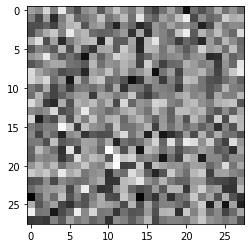

In [135]:
# check the generator output is of the right type and shape

G = Generator()

output = G.forward(generate_random_seed(100))

img = output.detach().numpy().reshape(28,28)

plt.imshow(img, interpolation='none',cmap='gray')

### 2.Training GAN

In [139]:
# train GAN
from timeit import default_timer as timer

# create Discriminator and Generator

D = Discriminator()
G = Generator()
outputs = []

epochs = 10

start = timer()
for epoch in range(epochs):
    print ("epoch = ", epoch + 1)
    counter = 0

  # train Discriminator and Generator

    for label, image_data_tensor, target_tensor in mnist_dataset:
        # train discriminator on true
        D.train(image_data_tensor, torch.FloatTensor([1.0]))

        # train discriminator on false
        # use detach() so gradients in G are not calculated
        D.train(G.forward(generate_random_seed(100)).detach(), torch.FloatTensor([0.0]))

        # train generator
        G.train(D, generate_random_seed(100), torch.FloatTensor([1.0]))
        
        # at every epoch, save several outputs
        if counter < 10:
            example = G.forward(generate_random_seed(100))
            outputs.append(example)  
            
        counter =+ 1

    pass
    
    
pass

end = timer()
print('time taken:', end-start)

epoch =  1
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
epoch =  2
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
counter =  190000
counter =  200000
counter =  210000
counter =  220000
counter =  230000
counter =  240000
epoch =  3
counter =  250000
counter =  260000
counter =  270000
counter =  280000
counter =  290000
counter =  300000
counter =  310000
counter =  320000
counter =  330000
counter =  340000
counter =  350000
counter =  360000
epoch =  4
counter =  370000
counter =  380000
counter =  390000
counter =  400000
counter =  410000
counter =  420000
counter =  430000
counter =  440000
counter =  450000
counter =  460000
counter =  470000
counter =  480000
epoch =  5
counter =  490000
counter =  500000
counter =  510000
counter =  520000
counter =  530000


## 3. Saving reconstruction outputs at various points during training into CSV

In [144]:
# convert data from torch into numpy arrays and save data into csv file 
import numpy
import matplotlib
import matplotlib.pyplot as plt
import csv

imgs = []
recons = []
labels = []

# outputs is 2D array, each line one reconstructed image, no original image or label
for k in range(0, 10):
    
    for i in range(0,9):
        recon = outputs[k*600+i].detach().numpy()
        recons.append(recon)
        
with open('M3.3_gan_data_epochs.csv','w', newline='') as f:
    writer = csv.writer(f)
    
    for i in range(0, len(recons)):

        y = (-1, -20) # instead of a target, denote with -1
        row2 = numpy.append(y, recons[i])
        writer.writerow(row2)
        pass


## 4. Printing outputs

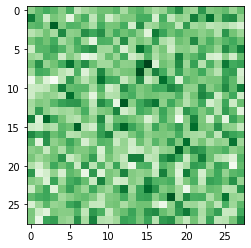

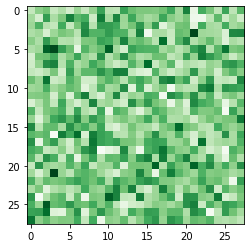

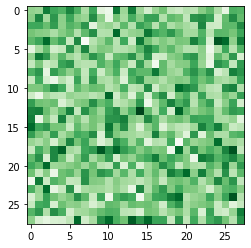

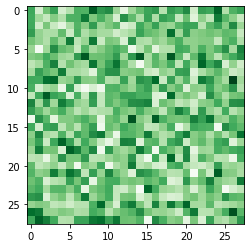

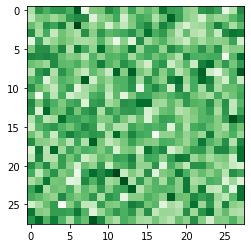

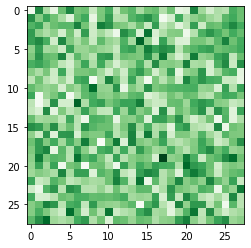

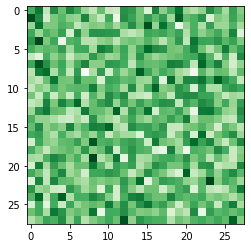

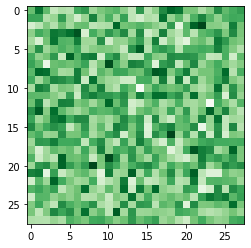

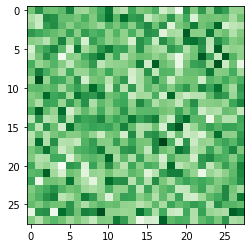

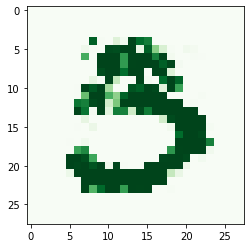

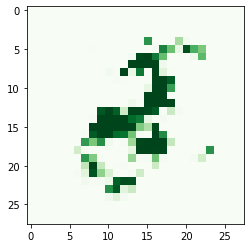

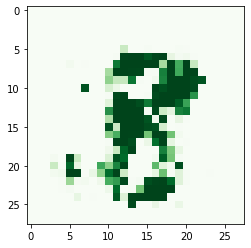

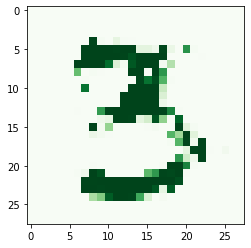

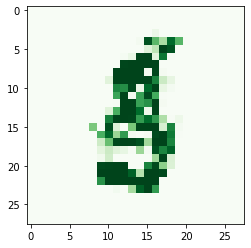

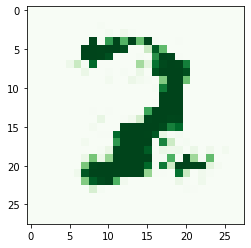

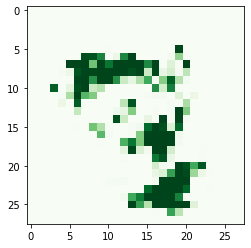

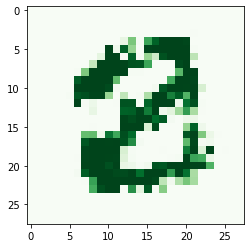

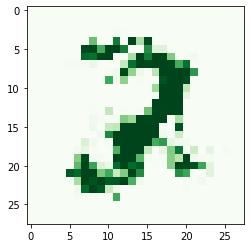

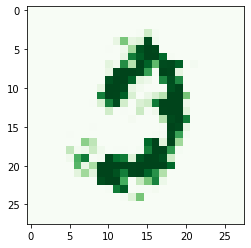

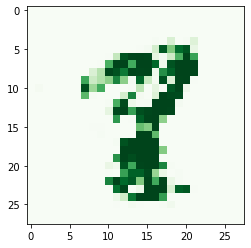

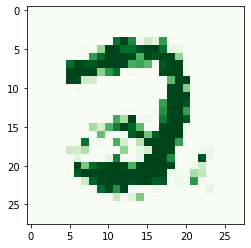

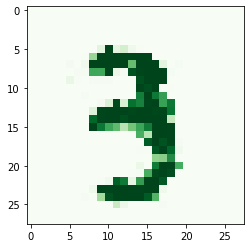

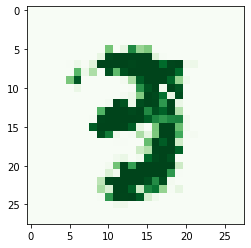

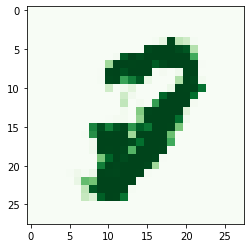

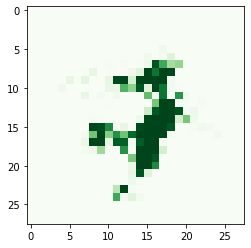

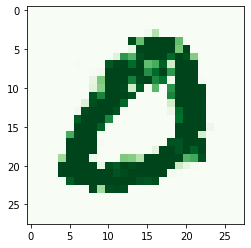

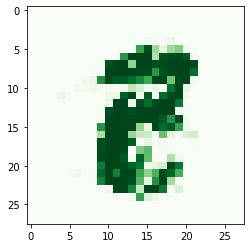

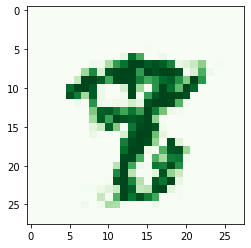

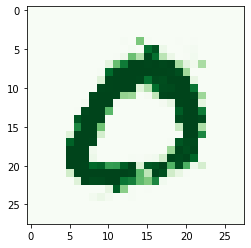

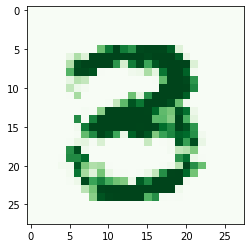

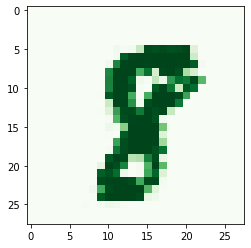

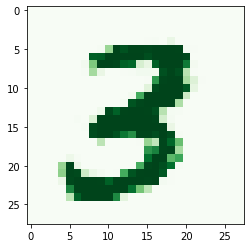

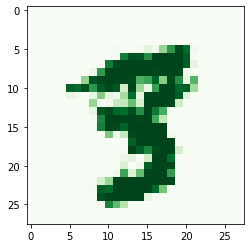

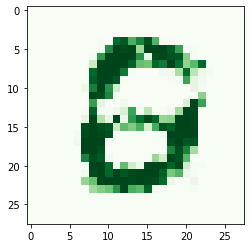

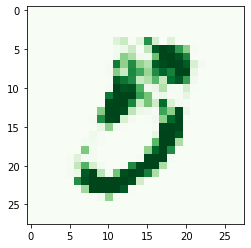

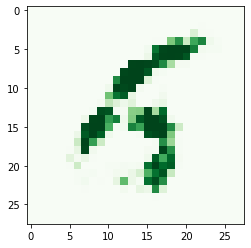

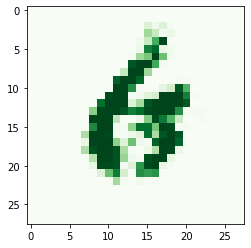

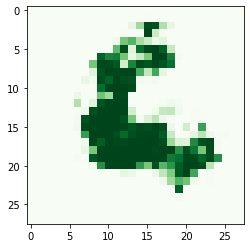

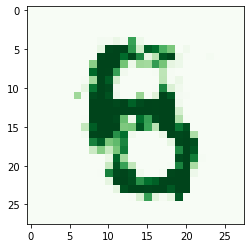

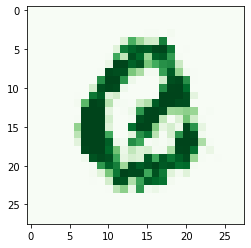

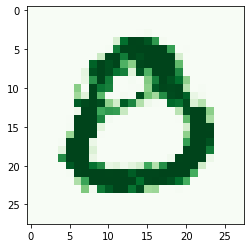

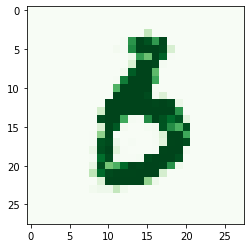

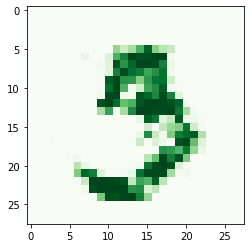

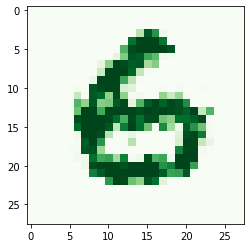

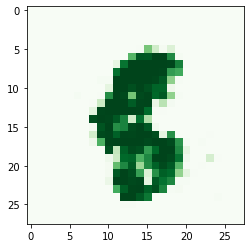

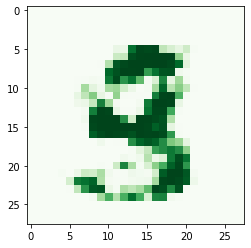

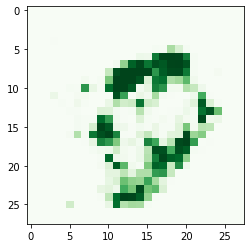

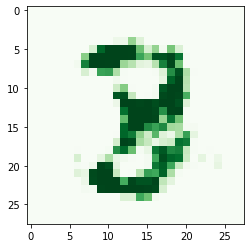

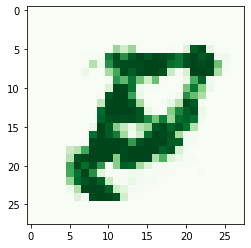

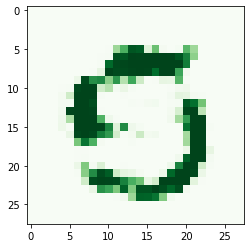

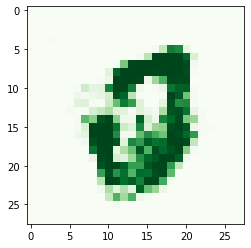

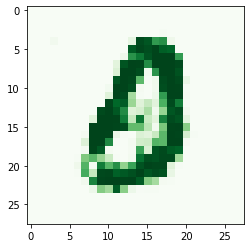

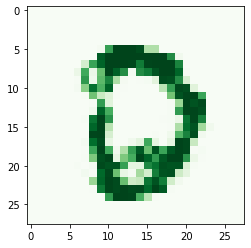

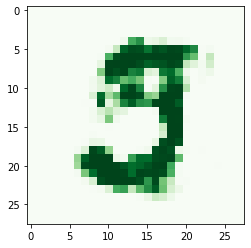

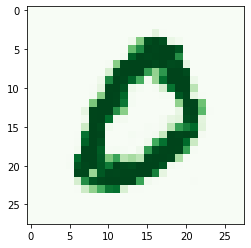

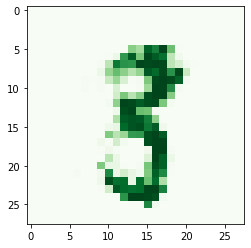

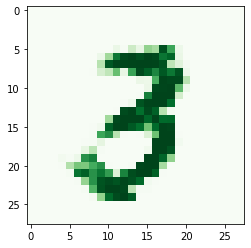

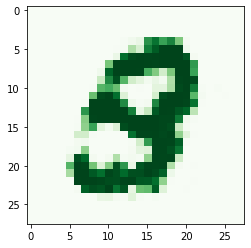

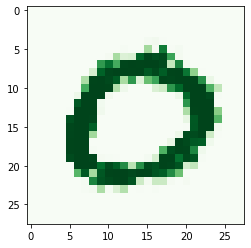

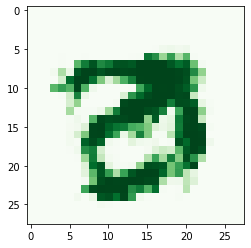

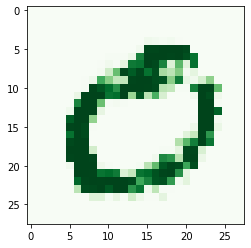

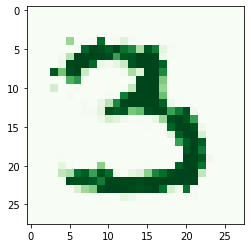

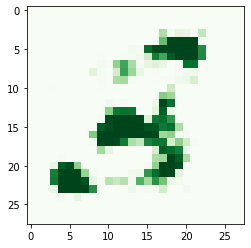

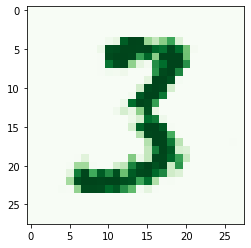

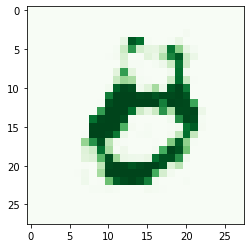

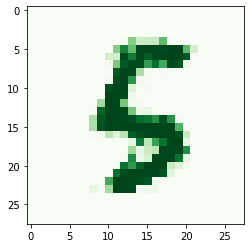

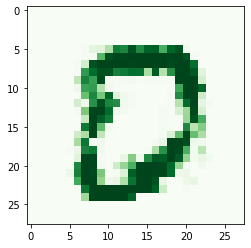

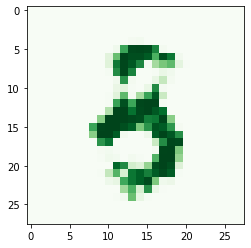

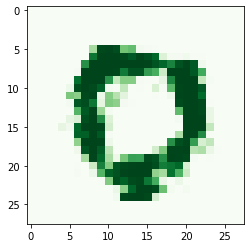

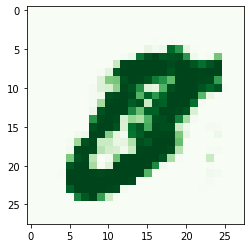

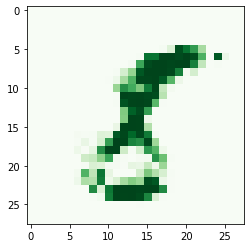

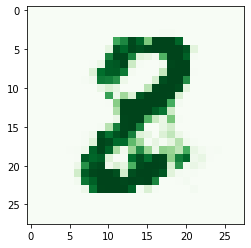

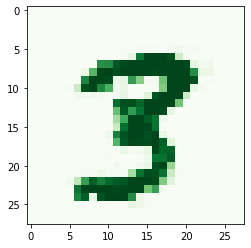

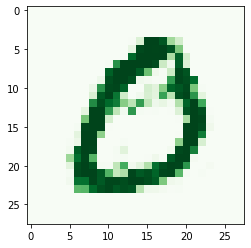

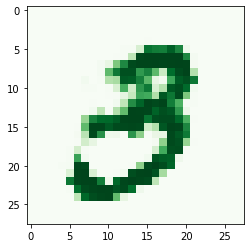

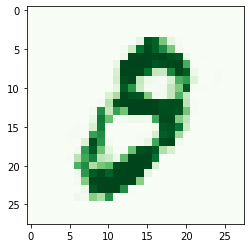

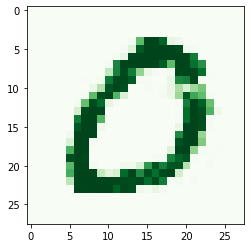

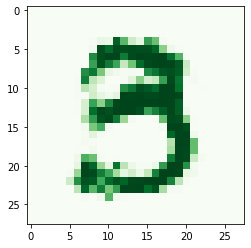

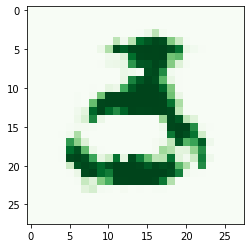

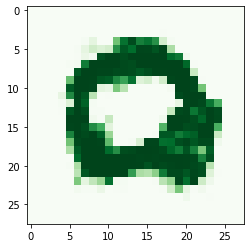

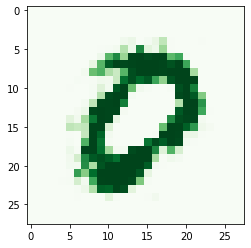

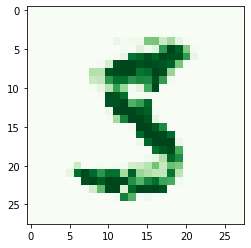

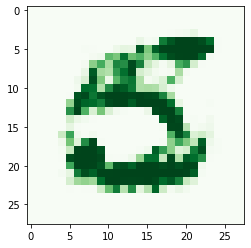

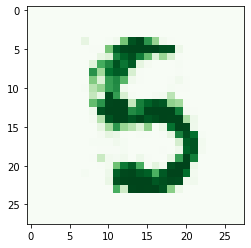

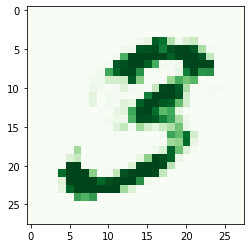

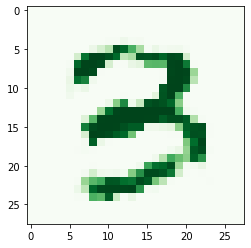

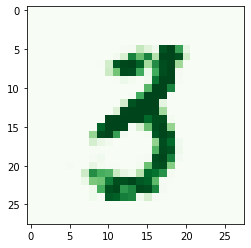

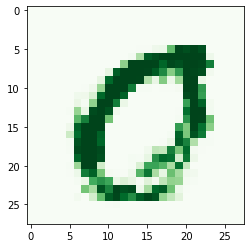

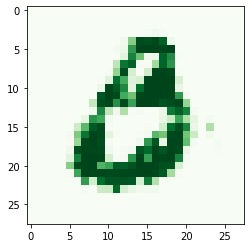

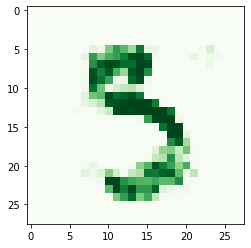

In [156]:
import csv
labels = []
orig_or_recon = []
values = []
with open('M3.3_gan_data_epochs.csv', newline='') as f:
    csv_data = csv.reader(f)
    for row in csv_data:
        labels.append(row[1])
        orig_or_recon.append(row[1])
        values.append(row[2:])
        

labels = numpy.asfarray(labels)
orig_or_recon = numpy.asfarray(orig_or_recon)
values = numpy.asfarray(values)

recon = []

for i in range(0,len(labels)):
    recon.append(values[i])
    image = values[i].reshape([28,28])  # reshape it into square
    plt.imshow(image, cmap='Greens') 
    plt.show()



          

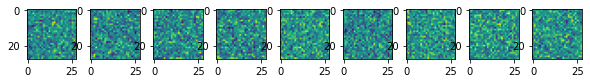

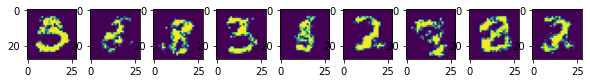

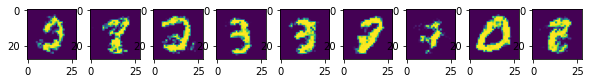

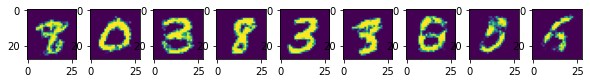

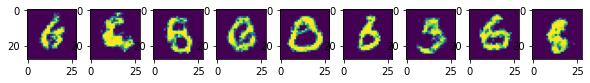

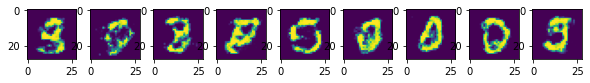

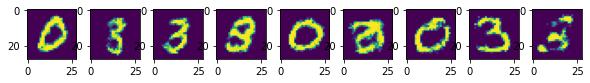

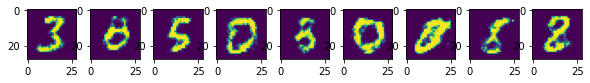

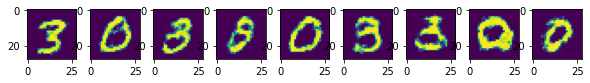

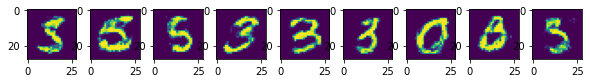

In [157]:
# visualise 
   
for k in range(0, 10): # plot the with every dimension

    plt.figure(figsize=(10, 2))

    for i, item in enumerate(recon): # enumerate - get counter per loop
        if i >= 9: break            # plot first 9 images
        plt.subplot(2, 9, i+1)
        item = recon[k*9+i].reshape(-1, 28, 28)    
        plt.imshow(item[0])
        


## 5. Save final outputs

In [141]:
# convert data from torch into numpy arrays and save data into csv file 
import numpy
import matplotlib
import matplotlib.pyplot as plt
import csv


import numpy
num_examples = 100

with open('M3.5_gan_data.csv','w', newline='') as f:
    writer = csv.writer(f)
    
    for i in range(0,num_examples):
        output = G.forward(generate_random_seed(100))
        output = output.detach().numpy().reshape(28,28)
        
        z = (-1,-20)
        row = numpy.append(z, output)
        writer.writerow(row)
        pass



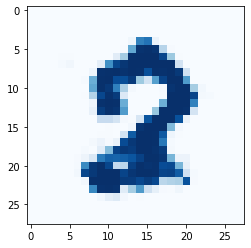

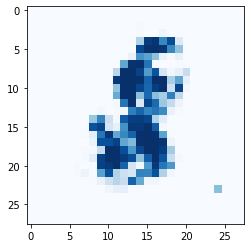

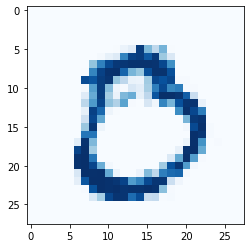

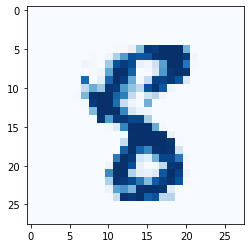

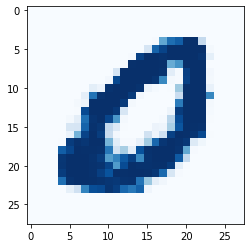

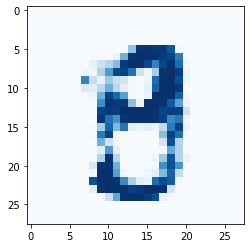

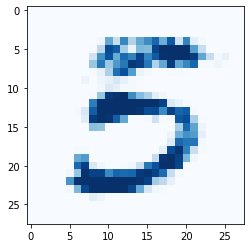

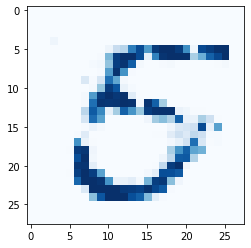

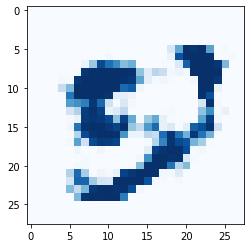

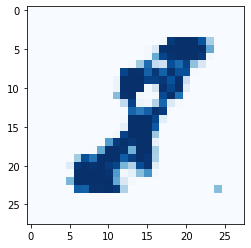

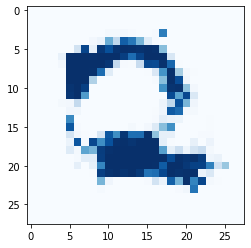

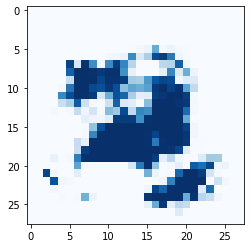

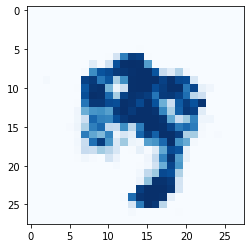

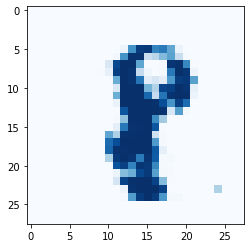

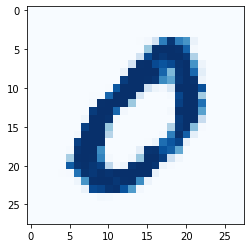

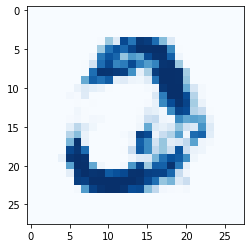

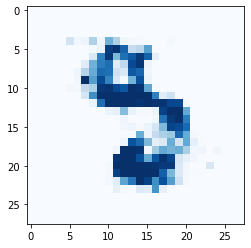

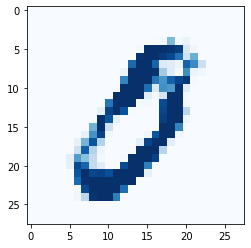

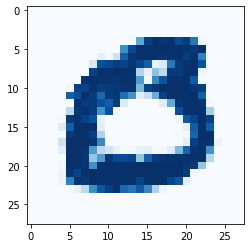

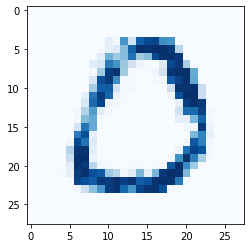

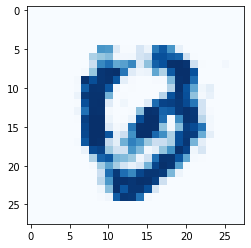

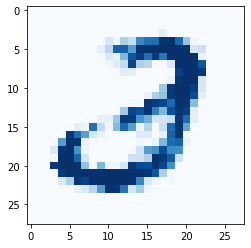

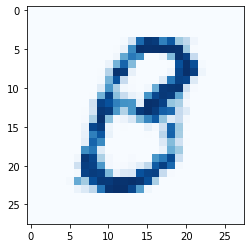

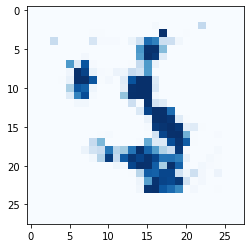

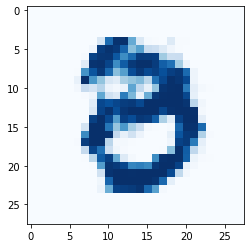

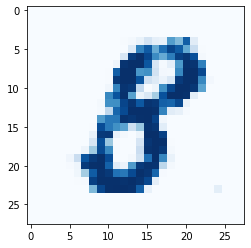

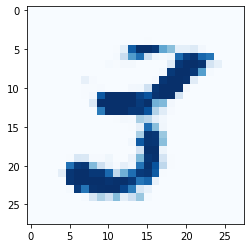

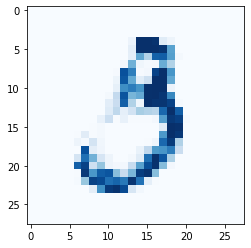

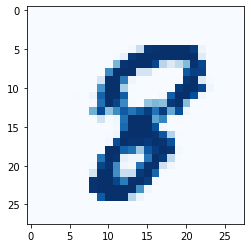

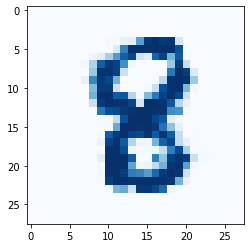

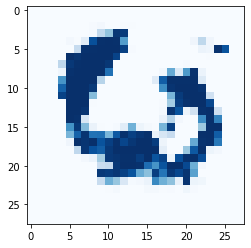

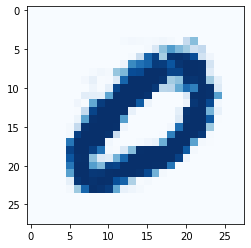

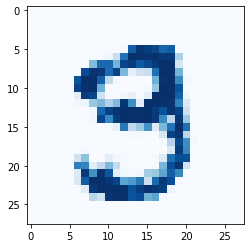

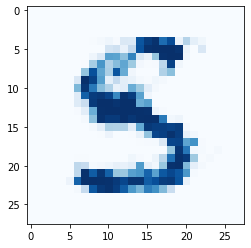

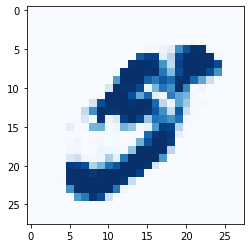

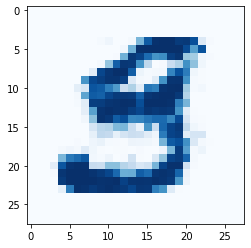

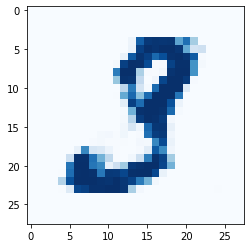

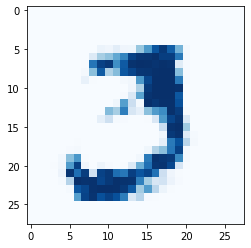

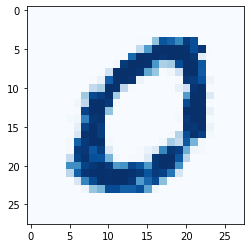

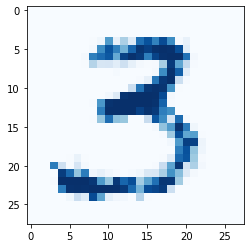

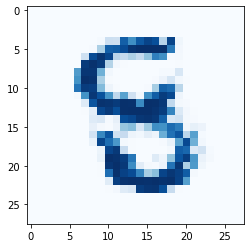

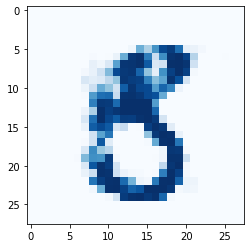

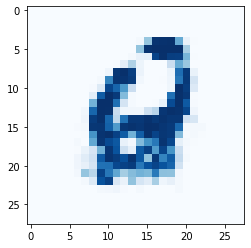

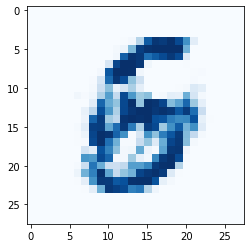

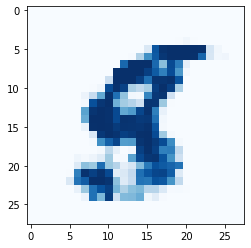

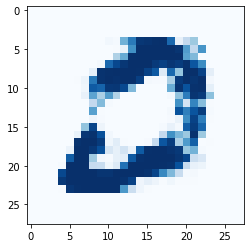

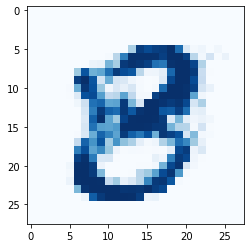

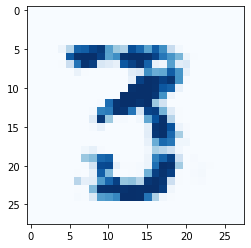

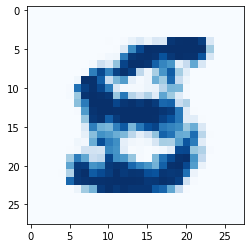

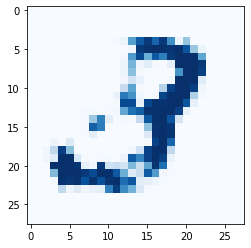

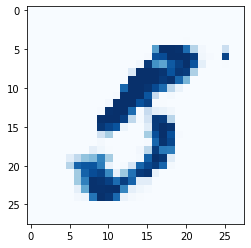

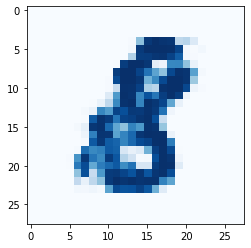

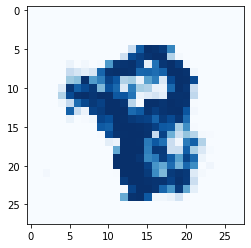

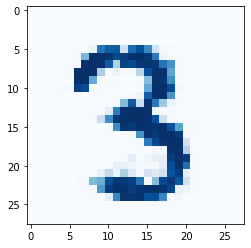

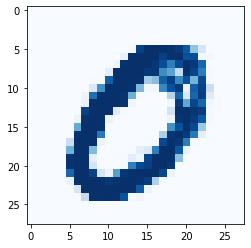

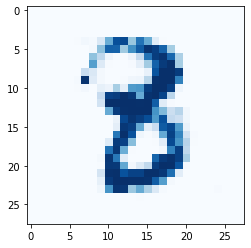

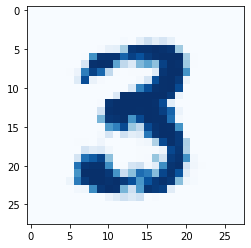

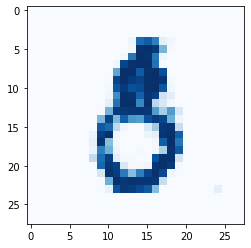

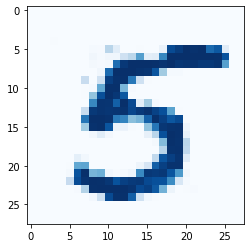

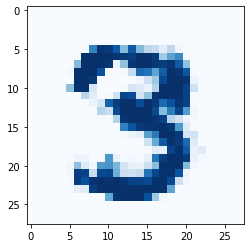

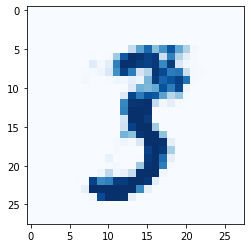

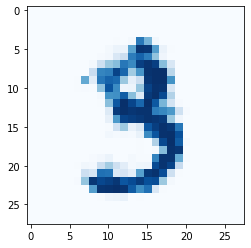

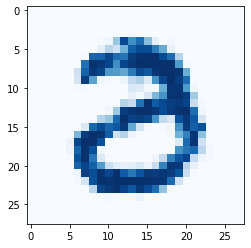

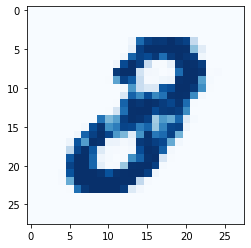

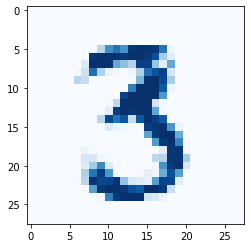

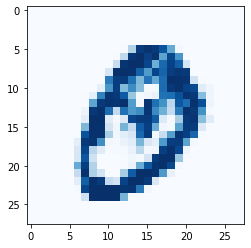

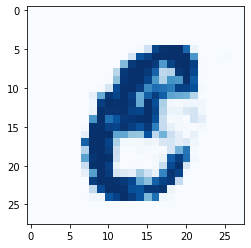

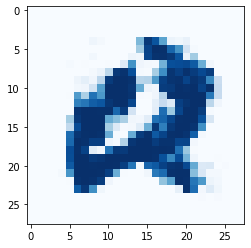

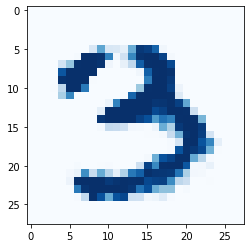

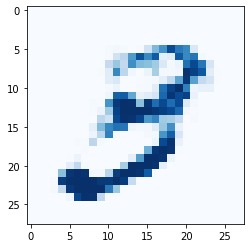

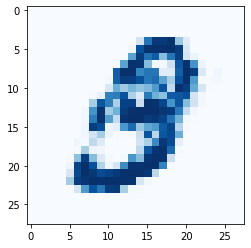

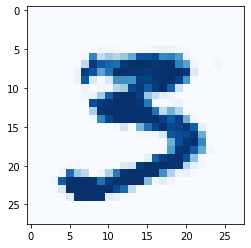

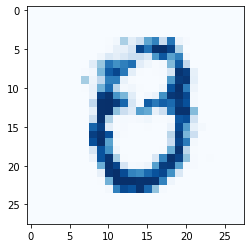

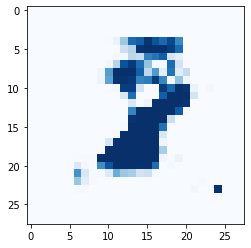

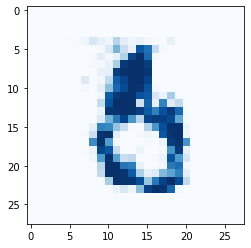

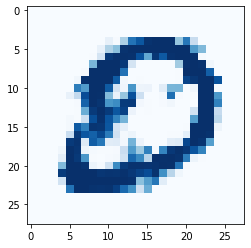

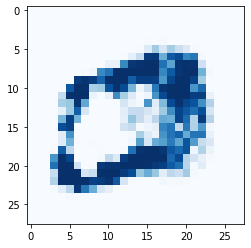

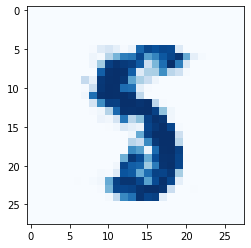

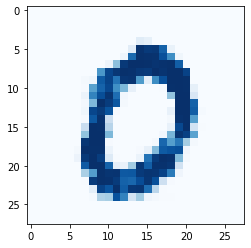

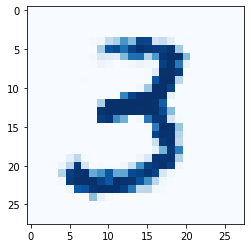

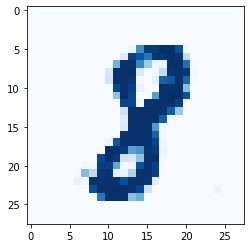

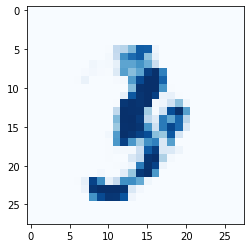

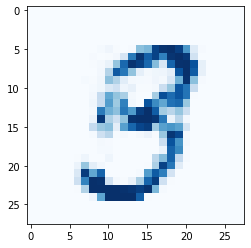

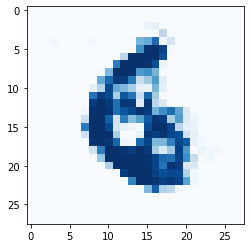

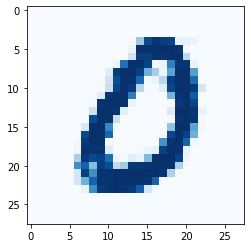

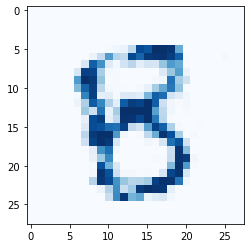

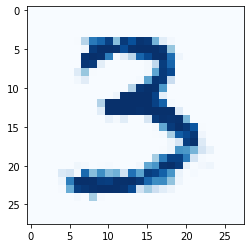

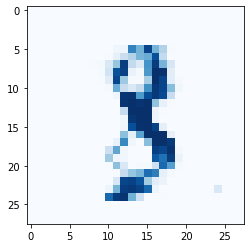

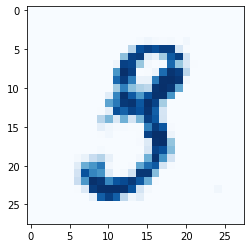

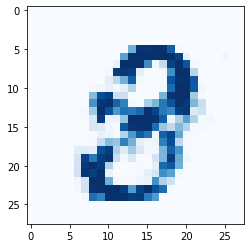

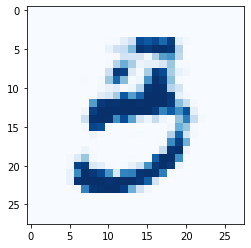

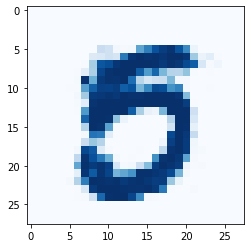

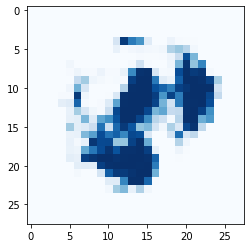

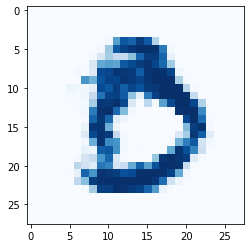

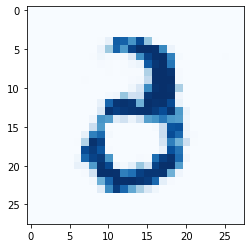

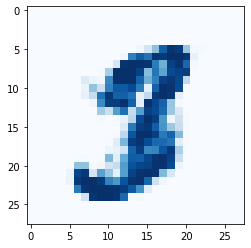

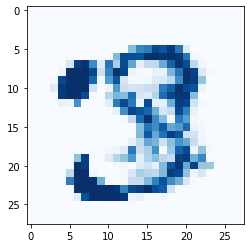

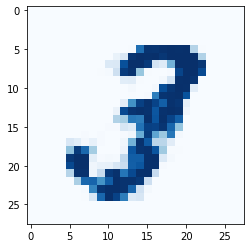

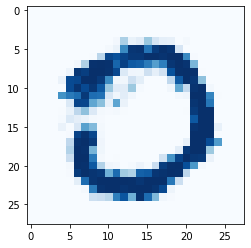

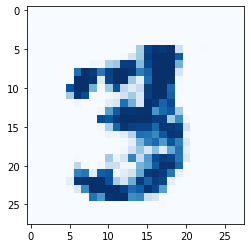

In [142]:
import csv
labels = []
orig_or_recon = []
values = []

# open and load outputs into arrays
with open('M3.5_gan_data.csv', newline='') as f:
    csv_data = csv.reader(f)
    for row in csv_data:
        labels.append(row[1])
        orig_or_recon.append(row[1])
        values.append(row[2:])
        

labels = numpy.asfarray(labels)
orig_or_recon = numpy.asfarray(orig_or_recon)
values = numpy.asfarray(values)

recon = []

for i in range(0,len(labels)):
    recon.append(values[i])
    image = values[i].reshape([28,28])  # reshape it into square
    plt.imshow(image, cmap='Blues') 
    plt.show()



          

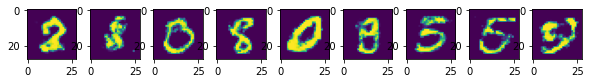

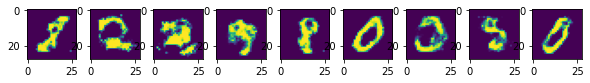

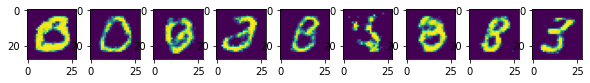

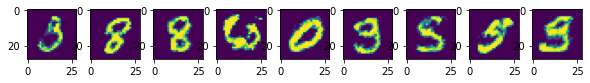

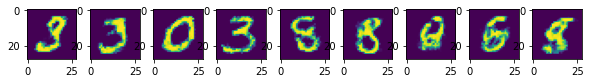

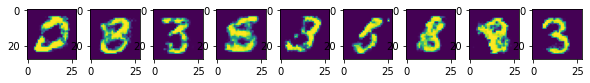

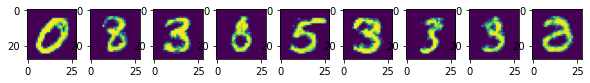

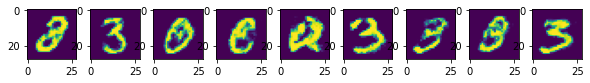

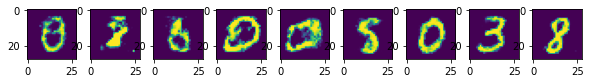

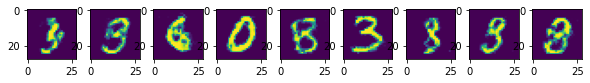

In [143]:
#plot 
   
for k in range(0, 10): # plot the with every dimension

    plt.figure(figsize=(10, 2))

    for i, item in enumerate(recon): # enumerate - get counter per loop
        if i >= 9: break            # plot first 9 images
        plt.subplot(2, 9, i+1)
        item = recon[k*9+i].reshape(-1, 28, 28)    
        plt.imshow(item[0])
        
